In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nobs=50
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html
#observations=pd.DataFrame(data=np.loadtxt('results/observations.gnu'),columns=['x','obs']) #dataframe qui contient les observations sur lesquelles on travaille
gp=pd.DataFrame(data=np.loadtxt('results/gp.gnu'),columns=['x','mean1','mean2']) #0.9
gp2=pd.DataFrame(data=np.loadtxt('results/gp2.gnu'),columns=['x','mean','mean2']) #-0.1
gp3=pd.DataFrame(data=np.loadtxt('results/gp3.gnu'),columns=['x','mean','mean2']) #0.5
ei=pd.DataFrame(data=np.loadtxt('results/EIprob.gnu'),columns=['theta','ei','ei2'])

#récupération des thetas visités
thetas_visites_ei=pd.DataFrame(data=np.loadtxt('results/visited_points_ei.gnu'),columns=['theta','theta2'])

#récup des différents états
step0=pd.DataFrame(data=np.loadtxt('results/step0.gnu'),columns=['theta','LL'])
step1=pd.DataFrame(data=np.loadtxt('results/step1.gnu'),columns=['theta','LL'])
step2=pd.DataFrame(data=np.loadtxt('results/step2.gnu'),columns=['theta','LL'])
step3=pd.DataFrame(data=np.loadtxt('results/step3.gnu'),columns=['theta','LL'])
step4=pd.DataFrame(data=np.loadtxt('results/step4.gnu'),columns=['theta','LL'])

step0noedm=pd.DataFrame(data=np.loadtxt('results/step0noedm.gnu'),columns=['theta','LL'])
step1noedm=pd.DataFrame(data=np.loadtxt('results/step1noedm.gnu'),columns=['theta','LL'])
step2noedm=pd.DataFrame(data=np.loadtxt('results/step2noedm.gnu'),columns=['theta','LL'])
step3noedm=pd.DataFrame(data=np.loadtxt('results/step3noedm.gnu'),columns=['theta','LL'])
step4noedm=pd.DataFrame(data=np.loadtxt('results/step4noedm.gnu'),columns=['theta','LL'])
#récup de la norme L2

L2=np.loadtxt('results/L2.gnu')
L2noedm=np.loadtxt('results/L2noedm.gnu')


Text(0, 0.5, 'EI')

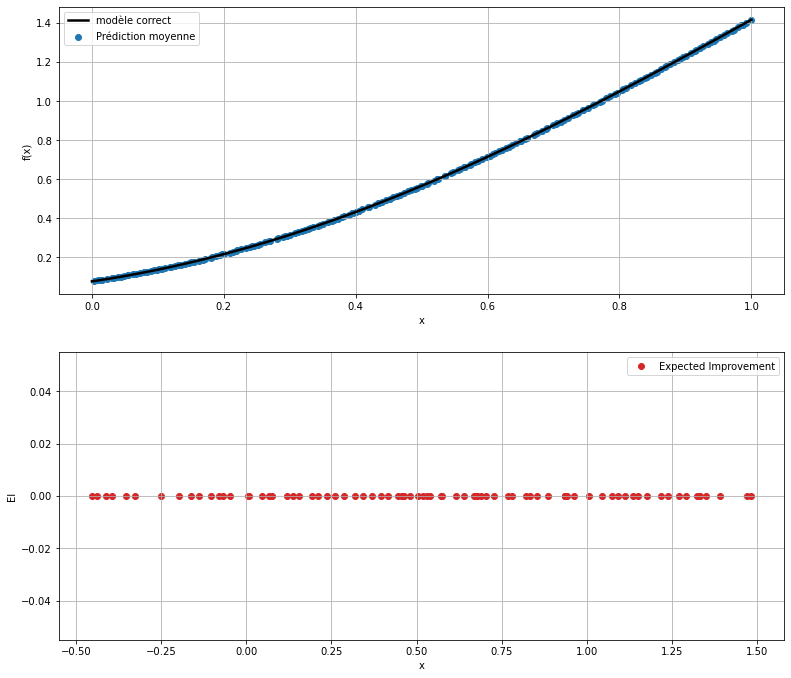

In [54]:

def f(x,theta):
    return np.sin(x*theta*2)*x+(x+0.15)*(1-theta)

thetaaff=0.5
X=np.linspace(0,1,500)

plt.figure(figsize=[13,18])
ax=plt.subplot(311)

plt.plot(X,f(X,thetaaff),color='black',linewidth=2.5,label='modèle correct')
plt.scatter('x','mean',data=gp3,label='Prédiction moyenne',color='tab:blue')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

ax=plt.subplot(312)
plt.scatter('theta','ei',data=ei,label='Expected Improvement',color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('EI')



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

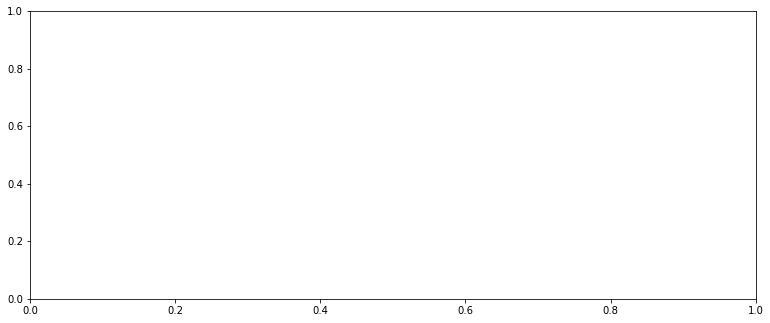

In [55]:
#affichage des thetas visités

plt.figure(figsize=[13,18])
ax=plt.subplot(311)
n=thetas_visites_ei.size

plt.scatter(y=np.zeros(n),x='theta',data=thetas_visites_ei,label='Prédiction moyenne',color='tab:blue')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')


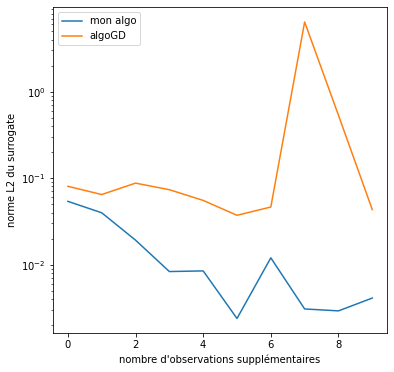

In [2]:
#affichage de la norme L2
plt.figure(figsize=[6,6])
plt.plot(L2,label="mon algo")
plt.plot(L2noedm,label="algoGD")
plt.legend()
plt.yscale("log")
plt.ylabel("norme L2 du surrogate")
plt.xlabel("nombre d'observations supplémentaires")
plt.show()


Text(0.5, 1.0, 'Step 0 mon algo')

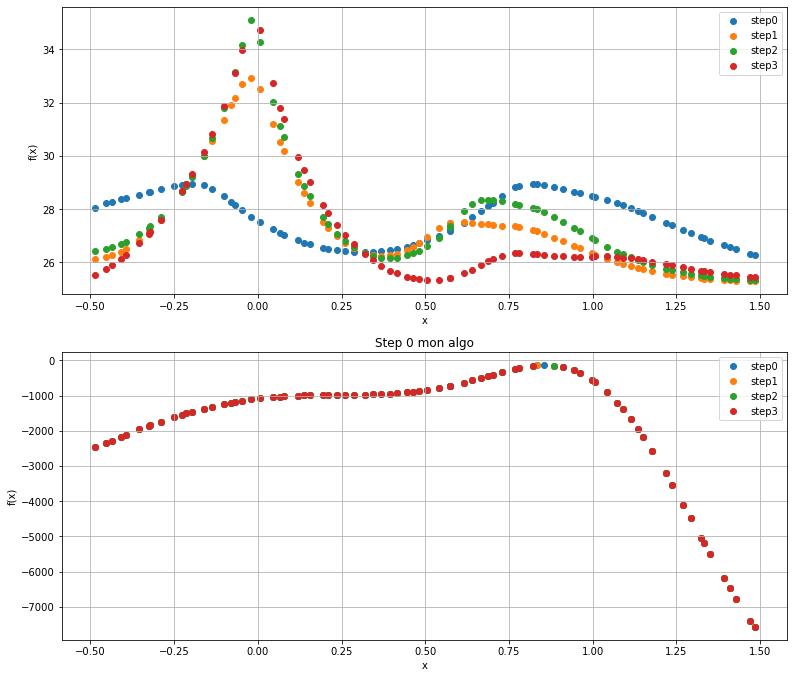

In [7]:
#affichage des loglikelihoods aux différentes steps pour mon algo
DF=step1 #choix de ce qu'on affiche
step=1
indice='theta2' #0 si avec edm, 1 sinon
title='Step 0 mon algo'

visited=thetas_visites_ei[indice][0:3+step]
plt.figure(figsize=[13,18])
ax=plt.subplot(311)

plt.scatter('theta','LL',data=step0,label='step0')
plt.scatter('theta','LL',data=step1,label='step1')
plt.scatter('theta','LL',data=step2,label='step2')
plt.scatter('theta','LL',data=step3,label='step3')
#plt.vlines(visited,26,33)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

ax=plt.subplot(312)

plt.scatter('theta','LL',data=step0noedm,label='step0')
plt.scatter('theta','LL',data=step1noedm,label='step1')
plt.scatter('theta','LL',data=step2noedm,label='step2')
plt.scatter('theta','LL',data=step3noedm,label='step3')
#plt.vlines(visited,26,33)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')



plt.title(title)
